**Importing Libraries**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Uploading Dataset**

In [64]:
df = pd.read_csv('/content/survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [65]:
df.shape

(1259, 27)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

**Checking for null values**

In [67]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


**Dropping irrelevant columns**

In [68]:
df.drop(['Country','state', 'Timestamp', 'comments'], axis = 1, inplace = True)

**Filling the null values**

In [69]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-69-f01ffbd33229>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [70]:
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-70-da0e35d284c0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [71]:
df.isnull().sum()

,0
Age,0
Gender,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0
tech_company,0
benefits,0


**Finding unique values in columns 'Gender'**

In [72]:
value_counts = df["Gender"].value_counts()
value_counts

,count
Gender,
Male,615
male,206
Female,121
M,116
female,62
F,38
m,34
f,15
Make,4


**Cleaning Gender column**

In [73]:
# Convert all gender values to lowercase to avoid case inconsistencies
df["Gender"] = df["Gender"].str.strip().str.lower()

# Replace specific terms to standardize
df["Gender"].replace(
    ["male", "m", "man", "msle", "make", "maile", "cis male", "guy", "mail", "mal",
     "male leaning androgynous", "male (cis)", "cis male", "malr"], "male", inplace=True
)

df["Gender"].replace(
    ["female", "f", "woman", "trans-female", "femake", "femail", "cis-female/femme",
     "cis female", "female (trans)", "cisfemalefemme", "woman", "female (cis)",
     "trans woman"], "female", inplace=True
)

df["Gender"].replace(
    ["neuter", "queer", "non-binary", "androgyne", "agender", "fluid", "enby",
     "genderqueer", "all", "nah", "something kinda male?", "a little about you",
     "guy (-ish) ^_^", "queer/she/they", "male-ish"], "other", inplace=True
)

df["Gender"].replace(
    ["cis man", "genderqueer", "p"], "other", inplace=True
)
df["Gender"] = df["Gender"].str.strip()



<ipython-input-73-2a08df283039>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace(


In [74]:
value_counts = df["Gender"].value_counts()
value_counts

,count
Gender,
male,990
female,251
other,17
"ostensibly male, unsure what that really means",1


**Cleaning Age Column**

<Axes: xlabel='Age'>

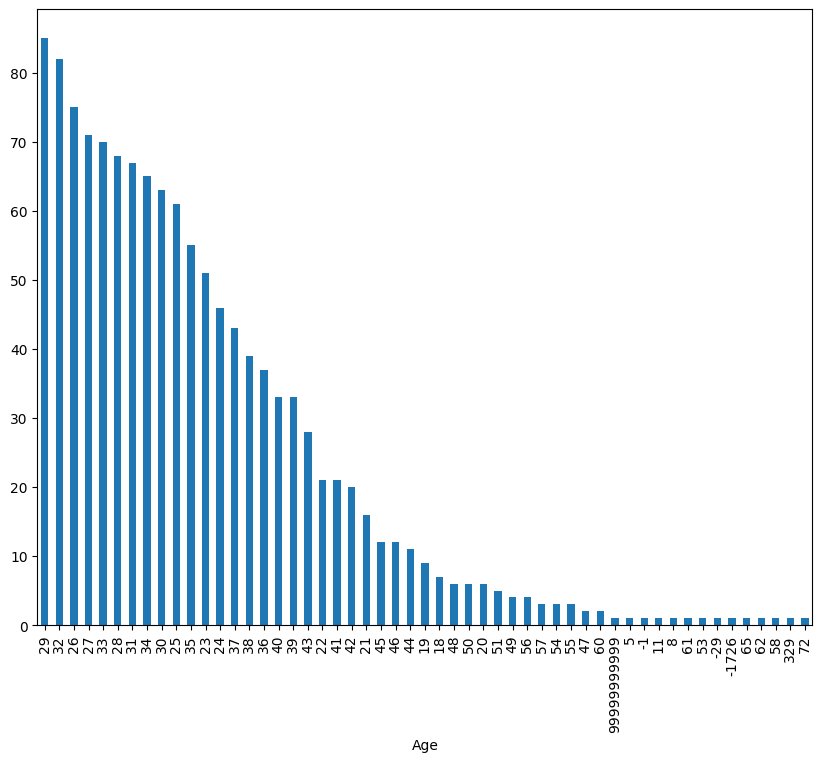

In [75]:
df["Age"].value_counts().plot(kind = "bar", figsize = (10,8))


In [76]:
df.drop(df[(df["Age"]>60) | (df["Age"]<18)]. index, inplace = True)

<ipython-input-77-5b8e9b47b7c3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


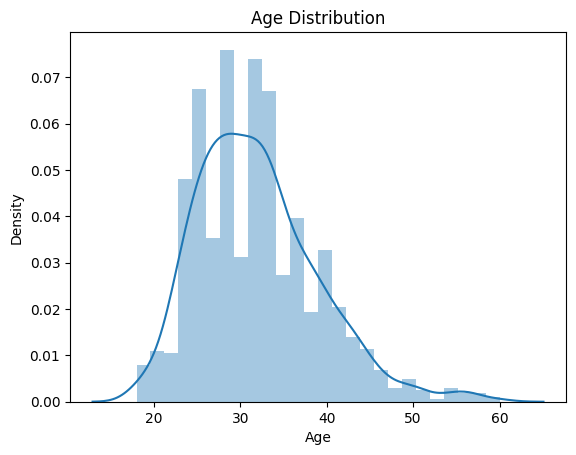

In [77]:
import seaborn as sns
sns.distplot(df["Age"])
plt.title("Age Distribution")
plt.show()

**Visualizing the Dataset**

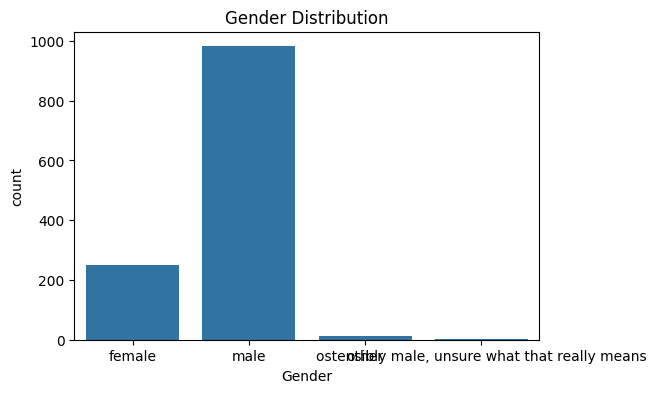

In [78]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Gender")
plt.title("Gender Distribution")
plt.show()

<ipython-input-79-9c09942a1669>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="treatment", palette="Set2")


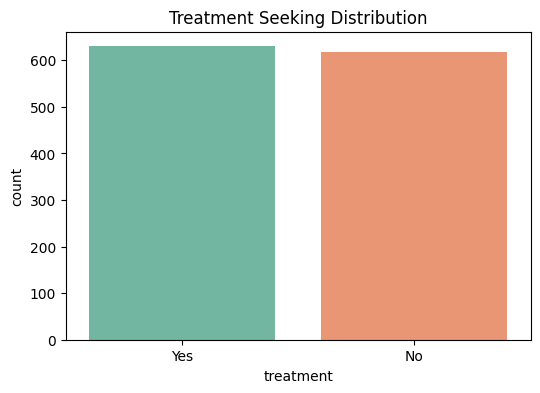

In [79]:
if "treatment" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="treatment", palette="Set2")
    plt.title("Treatment Seeking Distribution")
    plt.show()

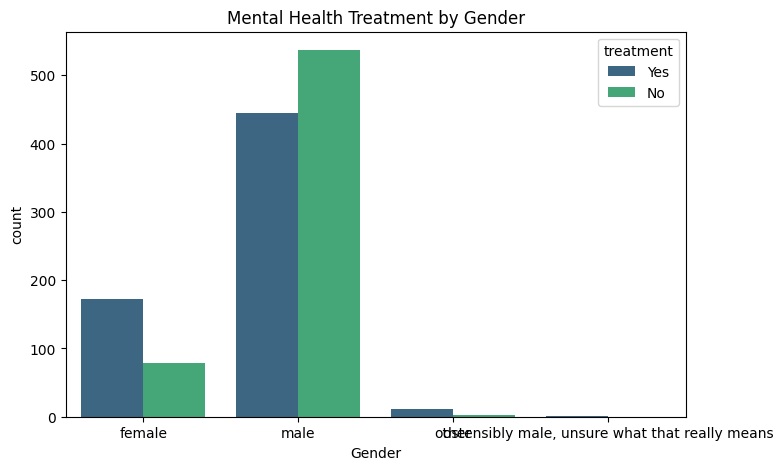

In [80]:
if "treatment" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x="Gender", hue="treatment", palette="viridis")
    plt.title("Mental Health Treatment by Gender")
    plt.show()

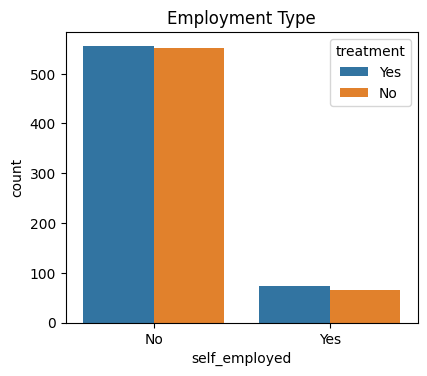

In [81]:
plt.figure(figsize=(10, 40))
plt.subplot(9,2,1)
sns.countplot(x='self_employed', hue='treatment', data=df)
plt.title('Employment Type')
plt.show()

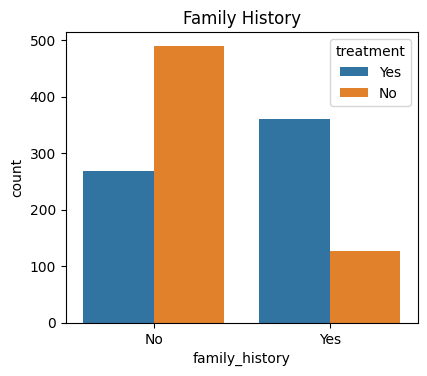

In [82]:
plt.figure(figsize=(10, 40))
plt.subplot(9,2,1)
sns.countplot(x='family_history', hue='treatment', data=df)
plt.title('Family History')
plt.show()

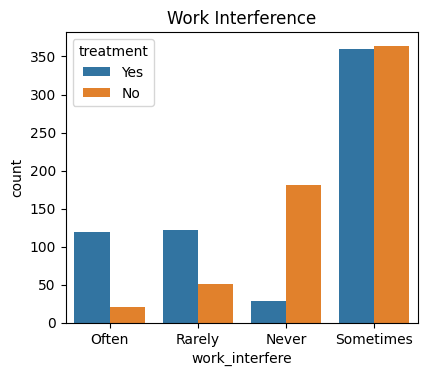

In [83]:
plt.figure(figsize=(10, 40))
plt.subplot(9,2,1)
sns.countplot(x='work_interfere', hue='treatment', data=df)
plt.title('Work Interference')
plt.show()

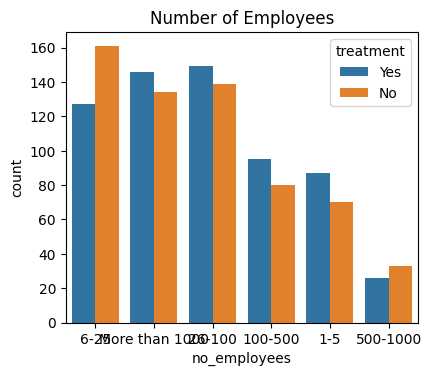

In [84]:

plt.figure(figsize=(10, 40))
plt.subplot(9,2,1)
sns.countplot(x='no_employees', hue='treatment', data=df)
plt.title('Number of Employees')
plt.show()

**EDA**

In [85]:
df.describe(include = 'all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,4,2,2,2,4,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,982,1107,759,630,724,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df.shape

(1247, 23)

In [87]:
import re

def normalize_text(text):
    """Normalize text by lowercasing and removing special characters."""
    if isinstance(text, str):
        # Lowercase and remove special characters
        text = text.lower()
        text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

**Displaying categorical Data**

In [88]:
cat_data = df.select_dtypes(object)
cat_data.head()

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,female,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,male,No,No,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,male,No,No,No,Rarely,6-25,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,male,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,male,No,No,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


**Converting Categorical Data into Numeric Value**

In [89]:
from sklearn.preprocessing import LabelEncoder
for col in cat_data:
    le = LabelEncoder()
    cat_data[col] = le.fit_transform(cat_data[col])
cat_data.head()

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,0,0,1,1,4,0,1,2,1,...,2,2,1,1,1,2,1,0,2,0
1,1,0,0,0,2,5,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,1,0,0,0,2,4,0,1,1,0,...,0,1,1,1,2,2,2,2,1,0
3,1,0,1,1,1,2,0,1,1,2,...,1,1,2,2,1,0,0,0,1,1
4,1,0,0,0,0,1,1,1,2,0,...,0,0,1,1,1,2,2,2,0,0


In [90]:
df.shape

(1247, 23)

In [91]:
from sklearn.preprocessing import LabelEncoder

for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

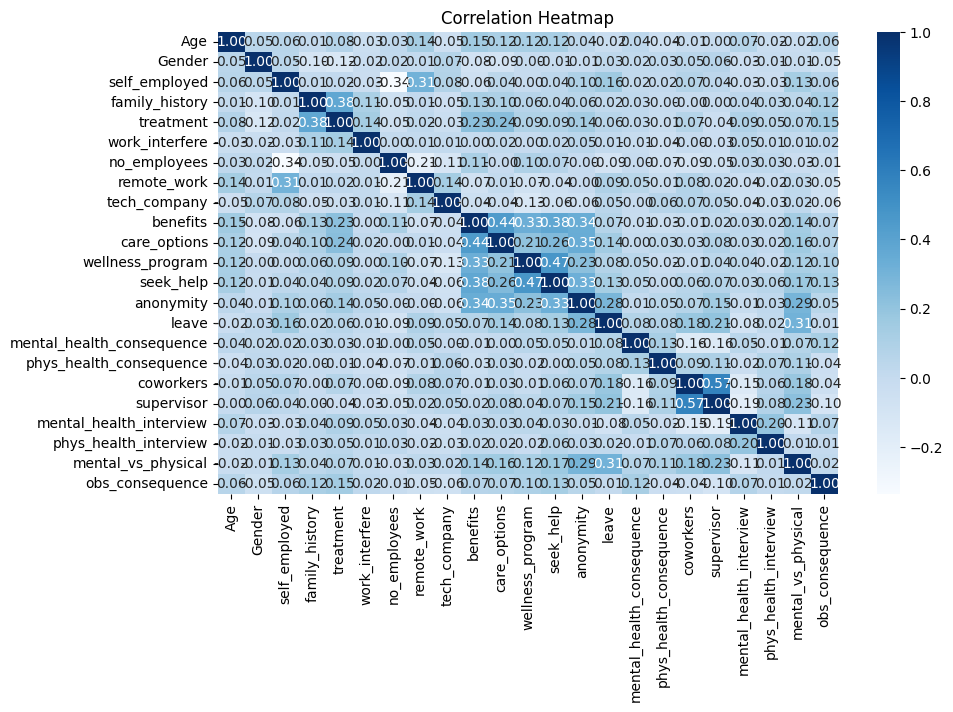

In [92]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

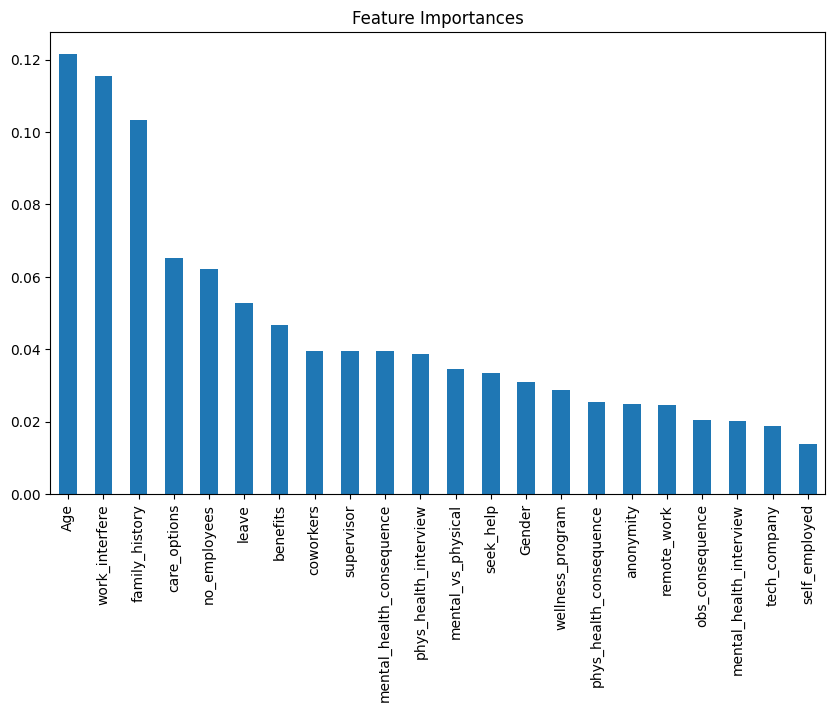

Selected Features: ['Age', 'work_interfere', 'family_history', 'care_options', 'no_employees', 'leave', 'benefits', 'coworkers', 'supervisor', 'mental_health_consequence', 'phys_health_interview', 'mental_vs_physical', 'seek_help', 'Gender', 'wellness_program', 'phys_health_consequence', 'anonymity', 'remote_work', 'obs_consequence', 'mental_health_interview']


In [93]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train a simple Random Forest for feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Plot feature importances
importance_scores = model.feature_importances_
important_features = pd.Series(importance_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
important_features.plot(kind="bar")
plt.title("Feature Importances")
plt.show()

# Select top features based on importance threshold
selected_features = important_features[important_features > 0.02].index.tolist()
X_selected = X[selected_features]
print(f"Selected Features: {selected_features}")


In [94]:
# Select features above importance threshold
selected_features = important_features[important_features > 0.02].index.tolist()
X_selected = X[selected_features]
print(f"Selected Features for Training: {selected_features}")


Selected Features for Training: ['Age', 'work_interfere', 'family_history', 'care_options', 'no_employees', 'leave', 'benefits', 'coworkers', 'supervisor', 'mental_health_consequence', 'phys_health_interview', 'mental_vs_physical', 'seek_help', 'Gender', 'wellness_program', 'phys_health_consequence', 'anonymity', 'remote_work', 'obs_consequence', 'mental_health_interview']


**Splitting the dataset into Training and Testing set**

In [95]:
X = df.drop("treatment", axis=1)
y = df["treatment"]

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

In [97]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((872, 22), (375, 22), (872,), (375,))

**Feature Scaling**

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Training different models on the Training set**

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [100]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=49),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=49)
}

In [101]:
results = []

In [102]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:16:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [103]:
results_df = pd.DataFrame(results)
print("Model Comparison Results:")
print(results_df.sort_values(by='F1-score', ascending=False))

Model Comparison Results:
                 Model  Accuracy  Precision    Recall  F1-score
1        Random Forest  0.776000   0.777680  0.776000  0.775754
0  Logistic Regression  0.749333   0.750487  0.749333  0.749141
3       Neural Network  0.664000   0.664611  0.664000  0.663833
2              XGBoost  0.672000   0.710158  0.672000  0.657396


In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
rf = RandomForestClassifier(random_state=49)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters & Accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.7351001642036126


In [48]:
!pip install shap


In [49]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [105]:
best_model = rf


In [108]:
best_model = grid_search.best_estimator_
explainer = shap.TreeExplainer(best_model)

In [52]:
explainer = shap.KernelExplainer(best_model.predict, shap.sample(X_train, 100))


In [ ]:
shap_values = explainer.shap_values(X_test)


  0%|          | 0/375 [00:00<?, ?it/s]

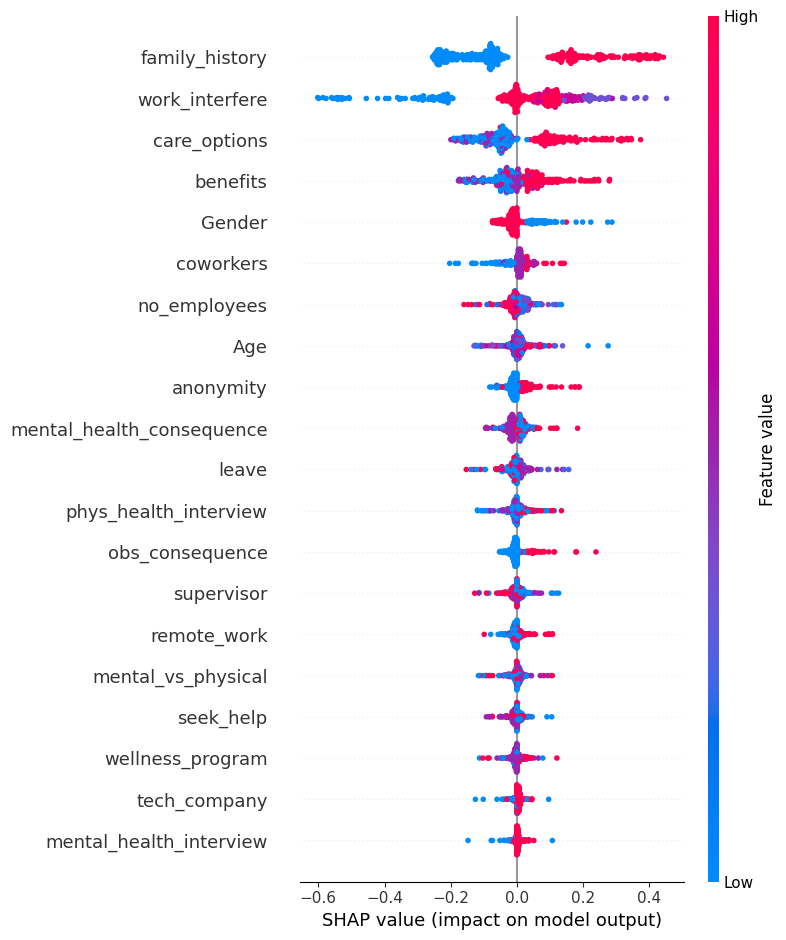

In [ ]:
shap.summary_plot(shap_values, X_test)


In [53]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=49)
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=49)

In [54]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest.pkl', 'wb')

# dump information to that file
pickle.dump(random_forest_model, file)